# Построение модели и анализ данных Dow Jones Index

В данном Jupiter ноутбуке представлены результаты работы с датасетом "Dow Jones Index": проведена предварительная обработка, EDA, а также построено несколько моделей, что предсказывают рост акции в процентах на следующей неделе с последующей визуализацией результатов.

## Предобработка данных

Для начала считаем данные и выведем их:

In [2]:
import pandas as pd

df = pd.read_csv("dow_jones_index.data")

df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,$80.22,$82.63,$80.07,$82.63,68230855,3.00424,-21.355713,86758820.0,$83.28,$81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,$83.28,$83.75,$80.18,$81.18,78616295,-2.52161,15.221032,68230855.0,$80.93,$79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,$80.93,$81.87,$79.72,$79.78,92380844,-1.42098,17.508519,78616295.0,$80.00,$79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,$80.00,$80.82,$78.33,$79.02,100521400,-1.22500,8.811952,92380844.0,$78.65,$76.78,-2.377620,54,0.594786


Обработаем полученные данные в нужный нам формат:

In [3]:
new_df = df.dropna()
new_df['open'] = new_df['open'].str.replace('$', '', regex=True).astype(float)
new_df['high'] = new_df['high'].str.replace('$', '', regex=True).astype(float)
new_df['low'] = new_df['low'].str.replace('$', '', regex=True).astype(float)
new_df['close'] = new_df['close'].str.replace('$', '', regex=True).astype(float)
new_df['next_weeks_open'] = new_df['next_weeks_open'].str.replace('$', '', regex=True).astype(float)
new_df['next_weeks_close'] = new_df['next_weeks_close'].str.replace('$', '', regex=True).astype(float)
new_df

<ipython-input-3-64062ec2792b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['open'] = new_df['open'].str.replace('$', '', regex=True).astype(float)
<ipython-input-3-64062ec2792b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['high'] = new_df['high'].str.replace('$', '', regex=True).astype(float)
<ipython-input-3-64062ec2792b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,-0.632547,90,0.172712
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,2,XOM,5/27/2011,80.22,82.63,80.07,82.63,68230855,3.004240,-21.355713,86758820.0,83.28,81.18,-2.521610,75,0.568801
746,2,XOM,6/3/2011,83.28,83.75,80.18,81.18,78616295,-2.521610,15.221032,68230855.0,80.93,79.78,-1.420980,68,0.578960
747,2,XOM,6/10/2011,80.93,81.87,79.72,79.78,92380844,-1.420980,17.508519,78616295.0,80.00,79.02,-1.225000,61,0.589120
748,2,XOM,6/17/2011,80.00,80.82,78.33,79.02,100521400,-1.225000,8.811952,92380844.0,78.65,76.78,-2.377620,54,0.594786


Теперь отберём нужные данные для нашего предсказания и подготовим их для линейной регрессии.

In [4]:
data_df = new_df[["open", "high", "low", "close", "volume", "percent_change_price", "percent_change_volume_over_last_wk", "previous_weeks_volume", "next_weeks_open", "next_weeks_close", "days_to_next_dividend", "percent_return_next_dividend", "percent_change_next_weeks_price"]]
data_df

,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,days_to_next_dividend,percent_return_next_dividend,percent_change_next_weeks_price
1,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,239655616.0,16.19,15.79,19,0.187852,-2.470660
2,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,242963398.0,15.87,16.13,12,0.189994,1.638310
3,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,138428495.0,16.18,17.14,5,0.185989,5.933250
4,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,151379173.0,17.33,17.37,97,0.175029,0.230814
5,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,154387761.0,17.39,17.28,90,0.172712,-0.632547
...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,80.22,82.63,80.07,82.63,68230855,3.004240,-21.355713,86758820.0,83.28,81.18,75,0.568801,-2.521610
746,83.28,83.75,80.18,81.18,78616295,-2.521610,15.221032,68230855.0,80.93,79.78,68,0.578960,-1.420980
747,80.93,81.87,79.72,79.78,92380844,-1.420980,17.508519,78616295.0,80.00,79.02,61,0.589120,-1.225000
748,80.00,80.82,78.33,79.02,100521400,-1.225000,8.811952,92380844.0,78.65,76.78,54,0.594786,-2.377620


In [5]:
y = data_df['percent_change_next_weeks_price']
X = data_df.drop('percent_change_next_weeks_price', axis=1)

##EDA

Начнём проводить разведочный анализ данных.

Для начала нарисуем гисторамму (распределение проценнта прироста акции на следующей неделе)


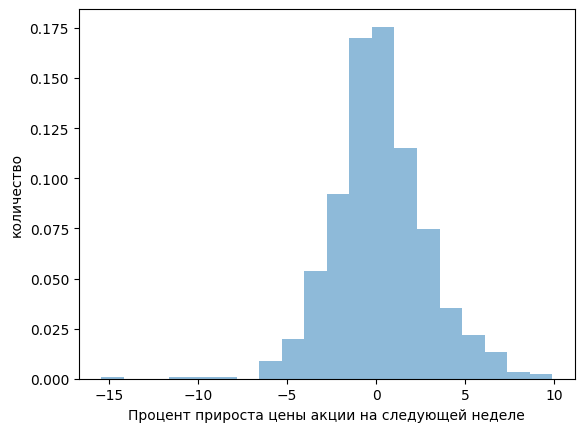

In [6]:
import matplotlib.pyplot as plt

plt.hist(y, 20, density=True, alpha = 0.5)
plt.xlabel('Процент прироста цены акции на следующей неделе')
plt.ylabel('количество')
plt.show()


Заметим, что распределение близко к нормальному (с небольшим перевесом в положительных значениях), что соответвует примерному положению дел на бирже.

А теперь взглянем на основные метрики для наших данных.

In [7]:
from datetime import datetime
new_df['date'] = pd.to_datetime(new_df['date'])
new_df.describe().T # удобная функция, считающая основные метрики

<ipython-input-7-c5610cbc51fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['date'] = pd.to_datetime(new_df['date'])


,count,mean,std,min,25%,50%,75%,max
quarter,720.0,1.541667e+00,4.986072e-01,1.000000e+00,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
open,720.0,5.374838e+01,3.276425e+01,1.059000e+01,2.996500e+01,4.601500e+01,7.280500e+01,1.721100e+02
high,720.0,5.476481e+01,3.335748e+01,1.094000e+01,3.066250e+01,4.691000e+01,7.434000e+01,1.735400e+02
low,720.0,5.272788e+01,3.223807e+01,1.040000e+01,2.871250e+01,4.495000e+01,7.110500e+01,1.678200e+02
close,720.0,5.382549e+01,3.292476e+01,1.052000e+01,3.041500e+01,4.612500e+01,7.276500e+01,1.705800e+02
volume,720.0,1.156040e+08,1.520844e+08,9.718851e+06,3.069225e+07,5.274535e+07,1.311530e+08,1.054415e+09
percent_change_price,720.0,3.014043e-02,2.504889e+00,-1.542290e+01,-1.297355e+00,0.000000e+00,1.630870e+00,9.882230e+00
percent_change_volume_over_last_wk,720.0,5.593627e+00,4.054348e+01,-6.143318e+01,-1.980428e+01,5.125859e-01,2.180062e+01,3.274089e+02
previous_weeks_volume,720.0,1.173876e+08,1.592322e+08,9.718851e+06,3.067832e+07,5.294556e+07,1.333230e+08,1.453439e+09
next_weeks_open,720.0,5.380850e+01,3.291975e+01,1.052000e+01,3.038500e+01,4.604000e+01,7.280500e+01,1.721100e+02


А НУЖНО ЛИ???

In [8]:
new_df.columns # для себя, так как мы уже смотрели из чего состоит датасет

Index(['quarter', 'stock', 'date', 'open', 'high', 'low', 'close', 'volume',
       'percent_change_price', 'percent_change_volume_over_last_wk',
       'previous_weeks_volume', 'next_weeks_open', 'next_weeks_close',
       'percent_change_next_weeks_price', 'days_to_next_dividend',
       'percent_return_next_dividend'],
      dtype='object')

Смотрим на уникальные значения по каждому из столбцов

In [9]:
new_df.nunique()

quarter                                 2
stock                                  30
date                                   24
open                                  694
high                                  684
low                                   685
close                                 687
volume                                720
percent_change_price                  715
percent_change_volume_over_last_wk    720
previous_weeks_volume                 720
next_weeks_open                       692
next_weeks_close                      690
percent_change_next_weeks_price       715
days_to_next_dividend                 103
percent_return_next_dividend          704
dtype: int64

Теперь к визуализации. Будем использовать библиотеку plotly.

Для начала отобразим изменение цены акции в первом и во втором квартале.

In [10]:
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

df_q1 = new_df[new_df['quarter'] == 1]
df_q2 = new_df[new_df['quarter'] == 2]

colors = px.colors.qualitative.Plotly

def create_stock_traces(df, title):
    fig = go.Figure()
    stocks = df['stock'].unique()
    for i, stock in enumerate(stocks):
        df_stock = df[df['stock'] == stock]
        fig.add_trace(
            go.Scatter(
                x=df_stock['date'],
                y=df_stock['close'],
                name=stock,
                mode="markers+lines",
                marker=dict(color=colors[i % 10], size=4),
                line=dict(color=colors[i % 10], width=1.5) # Почему там только 10 цветов, кринж,
                # тогда они будут повторяться, сделаем так, чтобы цвета по кругу шли
            )
        )
    fig.update_xaxes(rangeslider_visible=True)
    fig.update_layout(title=title)
    return fig

fig_q1 = create_stock_traces(df_q1, 'Цены акций в первом квартале')
fig_q2 = create_stock_traces(df_q2, 'Цены акций во втором квартале')


fig_q1.show()
fig_q2.show()


Далее, реализуем интересную опцию по анализу котировок акций, идея которой была взята [отсюда](https://medium.com/quantdart/%D1%82%D0%B5%D1%85%D0%BD%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%D0%B9-%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7-%D0%B8%D0%B7%D1%83%D1%87%D0%B5%D0%BD%D0%B8%D0%B5-%D1%81%D0%B2%D0%B5%D1%87-%D1%87%D0%B0%D1%81%D1%82%D1%8C-1-2883a9ce9fa3).

Визуализируем одну из самых известных биржевых терминов - Свечи. Для самых дорогой акции - IBM, самой дешевой - BAC, самый выросшей акции (конец-начало) и самой упавшей (найдем их также).

Для начала подготовим ланные для визуализации.

ниже СТОИТ ПЕРЕНЕСТИ ВСЕ ОБЪЯСНЕНИЕ В ОвЕРЛИФ. Сотри при редактировании

Единственное, я думал будет чуть проще считать так как у нас есть посчитанные проценты изменения по неделям, но оказалось, что так не сработает, т.к. цена всегда меняется, а проценты изменения считаются от этих цен - и просто суммирование процентов не работает

In [11]:
cheap_stock_df='BAC'
expensive_stock_df='IBM'

df_sorted = new_df.sort_values(by=['stock', 'date'])

first_open = df_sorted.groupby('stock')['open'].first().reset_index()
last_close = df_sorted.groupby('stock')['close'].last().reset_index()

merged_data = pd.merge(first_open, last_close, on='stock')
merged_data['percent_change'] = (merged_data['close'] - merged_data['open']) / merged_data['open'] * 100

most_increasing_stock_df = merged_data.loc[merged_data['percent_change'].idxmax()][0]
most_decreasing_stock_df = merged_data.loc[merged_data['percent_change'].idxmin()][0]
print(most_increasing_stock_df)
print('-'*5)
print(most_decreasing_stock_df)

IBM
-----
CSCO


Ну и заодно посмотрим на все акции, сортируя их:

In [12]:
merged_data=merged_data.sort_values(by="percent_change", ascending=False).reset_index(drop=True)
merged_data

,stock,open,close,percent_change
0,IBM,147.00,165.07,12.292517
1,KRFT,30.91,34.60,11.937884
2,MCD,74.25,81.84,10.222222
3,PFE,18.22,20.08,10.208562
4,AXP,44.20,48.34,9.366516
5,UTX,78.27,84.33,7.742430
6,CVX,90.95,97.90,7.641561
7,DD,48.30,51.96,7.577640
8,CAT,93.21,100.01,7.295355
9,TRV,53.12,56.68,6.701807


Покажем на графике рост или падение акции за весь период, данный в датасете:

ДОБАВЬ ПОДПИСИ ГРАФИКА

In [13]:
fig = px.bar(merged_data, x=merged_data.stock, y=merged_data.percent_change, color=merged_data.percent_change,
               title='Рост / падение акций в процентах')

fig.show()

In [14]:
fig = go.Figure()
fig.add_trace(
            go.Scatter(
                x=merged_data['stock'],
                y=merged_data['percent_change'],
                name='Рост / падение акций в процентах'
            ))
fig.show()

Теперь визуализируем "свечи". Стоит отметить, что IBM - это одновременно самая дорогая и самая прибыльная акция за весь период. Именно по этой причине график для неё был выведен только один раз.

In [15]:
def create_candlestick_chart(stock, df):
    stock_data = df[df['stock'] == stock]
    fig = go.Figure(data=[go.Candlestick(x=stock_data['date'],
                    open=stock_data['open'], high=stock_data['high'],
                    low=stock_data['low'], close=stock_data['close'])])
    fig.update_layout(title=f'Свеча для {stock}', xaxis_title='Дата', yaxis_title='Цена')
    fig.show()

# Создаем свечные графики для каждой из акций
create_candlestick_chart(cheap_stock_df, new_df)
create_candlestick_chart(most_increasing_stock_df, new_df)
create_candlestick_chart(most_decreasing_stock_df, new_df)

ПЖ, ОПИШИ ПОДРОБНЕЕ - ТЫ ЛУЧШЕ СПРАВИШЬСЯ. ТОЛЬКО ПРОШУ, В ФОРМАЛЬНОМ СТИЛЕ


ТУТ И ДО КОНЦА РАЗДЕЛА НИЧЕГО НЕ МЕНЯЛ - напиши лучше ты


Гуглим, про CSCO (15 в конце) и BAC (10 в конце), так как если построить их графики линейно - они должны были бы обанкротиться.

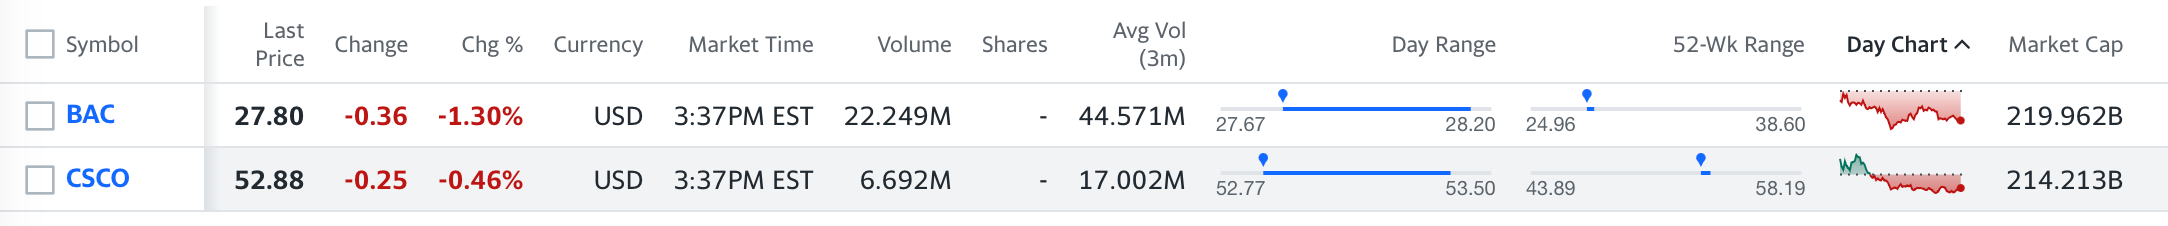

Для полной картины смотрим на инфляцию, начиная с 2011 года по наше время:

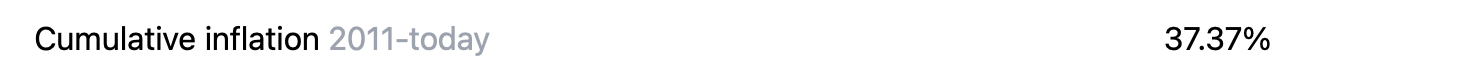

Эх, мы были бы богаты, если бы вложились тогда в +- худшие акции даже этого датасета. Ладно, пошутили и хватит, продолжаем анализ.


Потом используем в анализе данных

In [16]:
avg_percent_change_by_days = new_df.groupby('days_to_next_dividend')['percent_change_price'].mean().reset_index()

# Визуализируем результаты
fig = px.scatter(avg_percent_change_by_days,
                 x='days_to_next_dividend',
                 y='percent_change_price',
                 title='Изменение цены по дням до начисления дивидентов')
fig.show()

# Модель и получение результатов

###Первая модель

Перейдём к самой самой модели. Здесь мы используем ленийную регрессию из библиотеки sklearn. Принцип работы линейной регрессии будет подробно написан в overleaf.

Разбиваем данные на обучающую и тестовую выборку.

In [17]:
from sklearn.model_selection import train_test_split

train_size = 0.7

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)

Применяем модель к нашим данным. После этого выводим метрику оценки ошибки - MSE, MAE

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)


mean_squared_error(y_test, y_pred)

1.920605223810276

In [19]:
mean_absolute_error(y_test, y_pred)

0.8986085943721054

Получили довольно хорошие результаты, согласно нашим метрикам.

Визуализируем заренее известный результат и результат, полученный применением линейной регрессии. В качестве примера возьмём акции компании Intel.

In [20]:
intel = new_df[new_df['stock'] == "INTC"]
intel

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
157,1,INTC,2011-01-14,20.71,21.33,20.57,21.08,274111012,1.786580,-29.118929,386719626.0,21.03,20.82,-0.998573,20,0.853890
158,1,INTC,2011-01-21,21.03,21.20,20.62,20.82,218479469,-0.998573,-20.295260,274111012.0,21.03,21.46,2.044700,13,0.864553
159,1,INTC,2011-01-28,21.03,21.94,20.93,21.46,325168191,2.044700,48.832379,218479469.0,21.55,21.68,0.603248,6,0.838770
160,1,INTC,2011-02-04,21.55,21.71,21.03,21.68,277969054,0.603248,-14.515300,325168191.0,21.74,21.76,0.091996,89,0.830258
161,1,INTC,2011-02-11,21.74,21.86,21.35,21.76,236842359,0.091996,-14.795422,277969054.0,21.63,22.14,2.357840,82,0.827206
162,1,INTC,2011-02-18,21.63,22.14,21.28,22.14,201181541,2.357840,-15.056774,236842359.0,21.95,21.86,-0.410023,75,0.813008
163,1,INTC,2011-02-25,21.95,22.19,21.01,21.86,256135777,-0.410023,27.315745,201181541.0,21.75,21.56,-0.873563,68,0.823422
164,1,INTC,2011-03-04,21.75,22.08,21.35,21.56,291751623,-0.873563,13.905065,256135777.0,21.69,20.87,-3.780540,61,0.834879
165,1,INTC,2011-03-11,21.69,21.74,20.61,20.87,289874871,-3.780540,-0.643270,291751623.0,20.66,19.93,-3.533400,54,0.862482
166,1,INTC,2011-03-18,20.66,20.88,19.71,19.93,347426088,-3.533400,19.853814,289874871.0,19.90,20.37,2.361810,47,0.903161


In [21]:
intel_data = intel[["open", "high", "low", "close", "volume", "percent_change_price", "percent_change_volume_over_last_wk", "previous_weeks_volume", "next_weeks_open", "next_weeks_close", "days_to_next_dividend", "percent_return_next_dividend", "percent_change_next_weeks_price"]]
y_intel = intel_data['percent_change_next_weeks_price']
X_intel = intel_data.drop('percent_change_next_weeks_price', axis=1)
y_pred = lin_reg.predict(X_intel)


Выводим график:

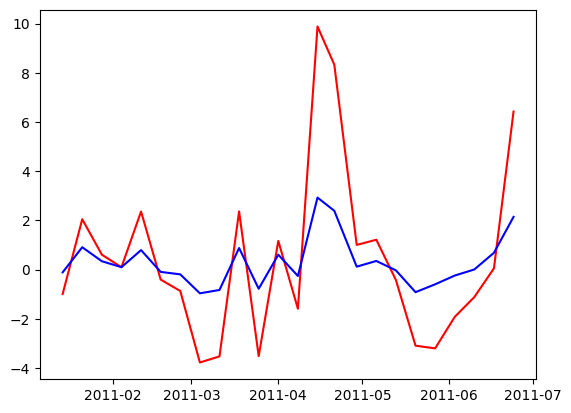

In [22]:
plt.plot(intel["date"], y_intel, c = "r")
plt.plot(intel["date"], y_pred, c = "blue")


Из графика видно, что полученное предсказание процента изменения цены акции имеет погрешность, но при этом имеет схожую линию графика.

### Вторая модель

В качестве второй модели будем использовать регрессию из библиотеки catboost. Подробнее о принципе работы написано в overleaf.

In [24]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.4 MB/s eta 0:00:00


In [25]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

In [26]:
cat.fit(X_train,y_train,verbose=False)
y_pred = cat.predict(X_test)


mean_squared_error(y_test, y_pred)


6.5300514318861405

Ошибка довольно велика, попробуем улучшить нашу модель при помощи grid search

In [28]:
cat = CatBoostRegressor()

grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6, 10],
        'l2_leaf_reg': [1, 3, 5, 7, 9]}

grid_search_result = cat.grid_search(grid, X=X_train, y=y_train, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Выходные данные были обрезаны до нескольких последних строк (5000).
26:	learn: 2.6191003	test: 2.5386700	best: 2.5312026 (7)	total: 728ms	remaining: 26.2s
27:	learn: 2.6142727	test: 2.5394820	best: 2.5312026 (7)	total: 752ms	remaining: 26.1s
28:	learn: 2.6118270	test: 2.5392680	best: 2.5312026 (7)	total: 766ms	remaining: 25.6s
29:	learn: 2.6088959	test: 2.5391013	best: 2.5312026 (7)	total: 797ms	remaining: 25.8s
30:	learn: 2.6041543	test: 2.5385091	best: 2.5312026 (7)	total: 830ms	remaining: 25.9s
31:	learn: 2.6005066	test: 2.5399932	best: 2.5312026 (7)	total: 854ms	remaining: 25.8s
32:	learn: 2.5941774	test: 2.5395728	best: 2.5312026 (7)	total: 877ms	remaining: 25.7s
33:	learn: 2.5886643	test: 2.5380067	best: 2.5312026 (7)	total: 906ms	remaining: 25.7s
34:	learn: 2.5829756	test: 2.5393833	best: 2.5312026 (7)	total: 931ms	remaining: 25.7s
35:	learn: 2.5786856	test: 2.5385191	best: 2.5312026 (7)	total: 955ms	remaining: 25.6s
36:	learn: 2.5724050	test: 2.5377363	best: 2.5312026 (7)	total

In [33]:
y_pred = cat.predict(X_test)
mean_squared_error(y_test, y_pred)

6.314698110259351

In [34]:
mean_absolute_error(y_test, y_pred)

1.9129309839953974

Результаты явно хуже, чем в прошлой модели. Вероятнее всего, дануую модель необходимо лучше оптимизировать, но пока что результат именно таков.

### Третья модель

В данном случае будем использовать модель LTSM из библиотеки TensorFlow. Принцип её работы будет объяснён в overleaf.

In [29]:
import tensorflow as tf
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(20, input_shape=(12, 1), return_sequences=True))
model.add(tf.keras.layers.LSTM(20))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.relu))

model.compile(optimizer="adam", loss="mean_squared_error")

model.fit(X_train.to_numpy(), y_train.to_numpy(), epochs=50)

Epoch 1/50
16/16 [==============================] - 3s 6ms/step - loss: 7.4764
Epoch 2/50
16/16 [==============================] - 0s 5ms/step - loss: 7.4764
Epoch 3/50
16/16 [==============================] - 0s 6ms/step - loss: 7.4764
Epoch 4/50
16/16 [==============================] - 0s 5ms/step - loss: 7.4764
Epoch 5/50
16/16 [==============================] - 0s 5ms/step - loss: 7.4764
Epoch 6/50
16/16 [==============================] - 0s 6ms/step - loss: 7.4764
Epoch 7/50
16/16 [==============================] - 0s 5ms/step - loss: 7.4764
Epoch 8/50
16/16 [==============================] - 0s 6ms/step - loss: 7.4764
Epoch 9/50
16/16 [==============================] - 0s 7ms/step - loss: 7.4764
Epoch 10/50
16/16 [==============================] - 0s 6ms/step - loss: 7.4764
Epoch 11/50
16/16 [==============================] - 0s 5ms/step - loss: 7.4764
Epoch 12/50
16/16 [==============================] - 0s 5ms/step - loss: 7.4764
Epoch 13/50
16/16 [==============================

In [30]:
model.evaluate(X_test.to_numpy(), y_test.to_numpy())

7/7 [==============================] - 1s 4ms/step - loss: 6.3065


6.306471824645996

Как видно из ошибки на тестовых данных, данная модель также не даёт хорошего результата для нашей задачи. Ошибка оказалась больше, чем в первой модели. Вероятнее всего при лучшей оптимизации можно добиться лучшего результата

#  Анализ результата

Так, ну попробуем немного поюзать scikit-learn и какую-нибудь новомодную хипстерскую модельку ради веселья

Давайте сделаем вот что - поделим данные на две штуки - по кварталам, одни будут

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


Для Максима: я почистил код и убрал нерабочее пока, чтобы не путаться. оставил только то, что работает (хотя здесь и нет непосредственного анализа данных, потому что я криворукий)

In [ ]:
X = avg_percent_change_by_days[['days_to_next_dividend']]
y = avg_percent_change_by_days['percent_change_price']

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
mae = mean_absolute_error(y, predictions)
mse = mean_squared_error(y, predictions)
rmse = np.sqrt(mse)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
fig=go.Figure()
fig.add_trace(go.Scatter(x=X.squeeze(), y=predictions, name='Регрессия'))
fig.add_trace(go.Scatter(
                 x=avg_percent_change_by_days.days_to_next_dividend,
                 y=avg_percent_change_by_days.percent_change_price, name='Точки', mode='markers'))
fig.show()

MAE: 1.194355357838965
MSE: 2.8597524028603463
RMSE: 1.6910802473154094


Ну я не знаю какой вывод можно тут сделать - акции будут скорее расти, если до дивидентов очень долго (это можно объяснить тем, что когда выплачиваются дивиденты - фактически у вас прибыль перераспределеятся среди инвесторов и по всей логике цена на акции должна падать примерно на выплаченные дивиденты)